# Анализ датасета

In [1]:
from mutagen.flac import FLAC

In [2]:
import os
music_directory = 'D:\\music_dataset\\music_dataset'

music_files = []
for root, dirs, files in os.walk(music_directory):
    for file in files:
            if file.endswith('.flac'):
                  music_files.append(os.path.join(music_directory, file))

In [3]:
len(music_files)

509

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame({'title': [FLAC(song).get('title', ['Unknown'])[0] for song in music_files],
                    'genre': [FLAC(song).get('genre', ['Unknown'])[0] for song in music_files],
                    'artist': [FLAC(song).get('artist', ['Unknown'])[0] for song in music_files],
                    'short_file': [os.path.basename(song).removesuffix('.flac') for song in music_files],
                    'file': [song for song in music_files]})
df.loc[df['title'] == 'Unknown', 'title'] = df.loc[df['title'] == 'Unknown', 'file']
df.head(15)

,title,genre,artist,short_file,file
0,Ain't My Bitch,Heavy Metal,Metallica,01 - Ain't My Bitch,D:\music_dataset\music_dataset\01 - Ain't My B...
1,01 - Brown Sugar,Unknown,The Rolling Stones,01 - Brown Sugar,D:\music_dataset\music_dataset\01 - Brown Suga...
2,Dani California,Rock,Red Hot Chili Peppers,01 - Dani California,D:\music_dataset\music_dataset\01 - Dani Calif...
3,Desecration Smile,Rock,Red Hot Chili Peppers,01 - Desecration Smile,D:\music_dataset\music_dataset\01 - Desecratio...
4,Fuel,Heavy Metal,Metallica,01 - Fuel,D:\music_dataset\music_dataset\01 - Fuel.flac
5,Ghost Of Perdition,Unknown,Opeth,01 - Ghost Of Perdition,D:\music_dataset\music_dataset\01 - Ghost Of P...
6,Gimme All Your Lovin',Rock,ZZ Top,01 - Gimme All Your Lovin',D:\music_dataset\music_dataset\01 - Gimme All ...
7,Good Times Roll,New Wave,The Cars,01 - Good Times Roll,D:\music_dataset\music_dataset\01 - Good Times...
8,Invitation,Acoustic Rock,Helloween,01 - Invitation,D:\music_dataset\music_dataset\01 - Invitation...
9,Keep Your Eyes Peeled,Metal,Queens of the Stone Age,01 - Keep Your Eyes Peeled,D:\music_dataset\music_dataset\01 - Keep Your ...


In [6]:
len(df[df['genre'] == 'Unknown'])

111

In [7]:
df = df.loc[(df['genre'] != 'Unknown') & (df['genre'] != '')]
df

,title,genre,artist,short_file,file
0,Ain't My Bitch,Heavy Metal,Metallica,01 - Ain't My Bitch,D:\music_dataset\music_dataset\01 - Ain't My B...
2,Dani California,Rock,Red Hot Chili Peppers,01 - Dani California,D:\music_dataset\music_dataset\01 - Dani Calif...
3,Desecration Smile,Rock,Red Hot Chili Peppers,01 - Desecration Smile,D:\music_dataset\music_dataset\01 - Desecratio...
4,Fuel,Heavy Metal,Metallica,01 - Fuel,D:\music_dataset\music_dataset\01 - Fuel.flac
6,Gimme All Your Lovin',Rock,ZZ Top,01 - Gimme All Your Lovin',D:\music_dataset\music_dataset\01 - Gimme All ...
...,...,...,...,...,...
493,Powderfinger,Acoustic Rock,Neil Young,Neil Young - Rust Never Sleeps - 06 - Powderfi...,D:\music_dataset\music_dataset\Neil Young - Ru...
494,Welfare Mothers,Acoustic Rock,Neil Young,Neil Young - Rust Never Sleeps - 07 - Welfare ...,D:\music_dataset\music_dataset\Neil Young - Ru...
495,Sedan Delivery,Acoustic Rock,Neil Young,Neil Young - Rust Never Sleeps - 08 - Sedan De...,D:\music_dataset\music_dataset\Neil Young - Ru...
496,"Hey Hey, My My (Into the Black)",Acoustic Rock,Neil Young,"Neil Young - Rust Never Sleeps - 09 - Hey Hey,...",D:\music_dataset\music_dataset\Neil Young - Ru...


In [8]:
df['genre'].unique()

array(['Heavy Metal', 'Rock', 'New Wave', 'Acoustic Rock', 'Metal',
       'Hard Rock', 'Alternative', 'Progressive Rock', 'Stoner Rock',
       'Disco', 'Singer-songwriter, Folk rock', 'Hip-Hop', 'Classic Rock',
       'Death Metal', 'Post Rock, Experimental', 'Alternative Rock'],
      dtype=object)

In [9]:
len(df['genre'].unique())

16

In [10]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df.loc[:, ['genre']])
enc.transform(df.loc[:, ['genre']]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [11]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
from tqdm import tqdm

In [12]:
def load_audio_features(file_paths):
    features = []
    for file_path in tqdm(file_paths):
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        features.append(mfcc.T.flatten())
    return features

In [13]:
flattened_features = load_audio_features(df['file'])


min_length = min([len(f) for f in flattened_features])
flattened_features = [f[:min_length] for f in flattened_features]

  5%|▍         | 19/390 [00:23<06:44,  1.09s/it]d:\grander-materials\.venv\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
100%|██████████| 390/390 [08:49<00:00,  1.36s/it]


In [14]:
df['audio'] = flattened_features

In [15]:
df.head(5)

,title,genre,artist,short_file,file,audio
0,Ain't My Bitch,Heavy Metal,Metallica,01 - Ain't My Bitch,D:\music_dataset\music_dataset\01 - Ain't My B...,"[-501.11377, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,Dani California,Rock,Red Hot Chili Peppers,01 - Dani California,D:\music_dataset\music_dataset\01 - Dani Calif...,"[-480.2727, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,Desecration Smile,Rock,Red Hot Chili Peppers,01 - Desecration Smile,D:\music_dataset\music_dataset\01 - Desecratio...,"[-498.46283, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,Fuel,Heavy Metal,Metallica,01 - Fuel,D:\music_dataset\music_dataset\01 - Fuel.flac,"[-497.3915, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,Gimme All Your Lovin',Rock,ZZ Top,01 - Gimme All Your Lovin',D:\music_dataset\music_dataset\01 - Gimme All ...,"[-578.5449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [295]:
df.groupby(by='genre').count()

,title,artist,short_file,file,audio
genre,,,,,
Acoustic Rock,27,27,27,27,27
Alternative,39,39,39,39,39
Alternative Rock,1,1,1,1,1
Classic Rock,5,5,5,5,5
Death Metal,8,8,8,8,8
Disco,10,10,10,10,10
Hard Rock,28,28,28,28,28
Heavy Metal,47,47,47,47,47
Hip-Hop,14,14,14,14,14


In [285]:
import prac3.nn
import importlib
importlib.reload(prac3.nn)

<module 'prac3.nn' from 'd:\\grander-materials\\Нейронки\\Практики\\prac3\\nn.py'>

In [286]:
from prac3.nn import StupidNeuralNetwork, Dataset as Dataset

In [287]:
dataset = Dataset()
dataset.normalize_data(df)
dataset.prepare_dataset(df)

In [288]:
nn = StupidNeuralNetwork(epochs=50, batch_size=4)
nn.train(dataset.train_data, dataset.train_target)
nn.test(dataset.test_data, dataset.test_target)

Эпоха: 1/50


d:\grander-materials\Нейронки\Практики\prac3\nn.py:31: RuntimeWarning: overflow encountered in exp
  'sigmoid': lambda x: 1 / (1 + np.exp(-x)),


Ошибка: 0.06049679487179487
Точность: 47.81650641025641%
Эпоха: 2/50
Ошибка: 0.06229967948717949
Точность: 47.81650641025641%
Эпоха: 3/50
Ошибка: 0.06229967948717949
Точность: 47.81650641025641%
Эпоха: 4/50


KeyboardInterrupt: 

In [289]:
res = nn.fit(dataset.test_data)
res

d:\grander-materials\Нейронки\Практики\prac3\nn.py:31: RuntimeWarning: overflow encountered in exp
  'sigmoid': lambda x: 1 / (1 + np.exp(-x)),


array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=int8)

In [290]:
enc = OneHotEncoder()
enc = enc.fit(df.loc[:, ['genre']])

In [294]:
res

array([['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alternative Rock'],
       ['Alter

In [ ]:
class SOM:
    def __init__(self, map_size, input_size, sigma=0.3, learning_rate=0.5):
        self.map_size = map_size
        self.input_size = input_size
        self.sigma = sigma
        self.learning_rate = learning_rate
        self.weights = np.random.rand(map_size[0], map_size[1], input_size)

    def find_bmu(self, x):
        """ Найти лучший соответствующий узел (BMU) """
        distances = np.linalg.norm(self.weights - x, axis=2)
        return np.unravel_index(np.argmin(distances), distances.shape)

    def neighborhood_function(self, bmu, iteration, max_iterations):
        """ Функция соседства """
        t1 = 1000
        t2 = 1000
        sigma_t = self.sigma * np.exp(-iteration / t1)
        learning_rate_t = self.learning_rate * np.exp(-iteration / t2)
        dist_sq = np.sum((np.indices(self.map_size).T - np.array(bmu)).T ** 2, axis=0)
        return learning_rate_t * np.exp(-dist_sq / (2 * sigma_t ** 2))

    def train(self, data, iterations):
        """ Обучение SOM """
        for iteration in tqdm(range(iterations)):
            for x in data:
                bmu = self.find_bmu(x)
                nh_func = self.neighborhood_function(bmu, iteration, iterations)
                self.weights += nh_func[:, :, np.newaxis] * (x - self.weights)

    def visualize(self, data):
        """ Визуализация SOM """
        plt.figure(figsize=(7, 7))
        plt.pcolor(np.linalg.norm(self.weights, axis=2).T, cmap='bone_r', alpha=0.2)
        plt.colorbar()

        for x in data:
            bmu = self.find_bmu(x)
            plt.text(bmu[1] + 0.5, bmu[0] + 0.5, '.', color=plt.cm.Reds(x[0]), fontdict={'weight': 'bold', 'size': 11})

        plt.show()

# Загрузка и обработка аудиофайлов
def load_audio_features(file_paths):
    features = []
    for file_path in tqdm(file_paths):
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        features.append(mfcc.T.flatten())
    return features

In [ ]:
flattened_features = load_audio_features(music_files[:10])


min_length = min([len(f) for f in flattened_features])
flattened_features = [f[:min_length] for f in flattened_features]
# max_length = max([len(f) for f in flattened_features])
# flattened_features = [np.pad(f, (0, max_length - len(f)), 'constant') for f in flattened_features]
data = np.array(flattened_features)

100%|██████████| 10/10 [00:14<00:00,  1.41s/it]

[(732160,), (732160,), (732160,), (732160,), (732160,), (732160,), (732160,), (732160,), (732160,), (732160,)]


100%|██████████| 100/100 [11:54<00:00,  7.14s/it]


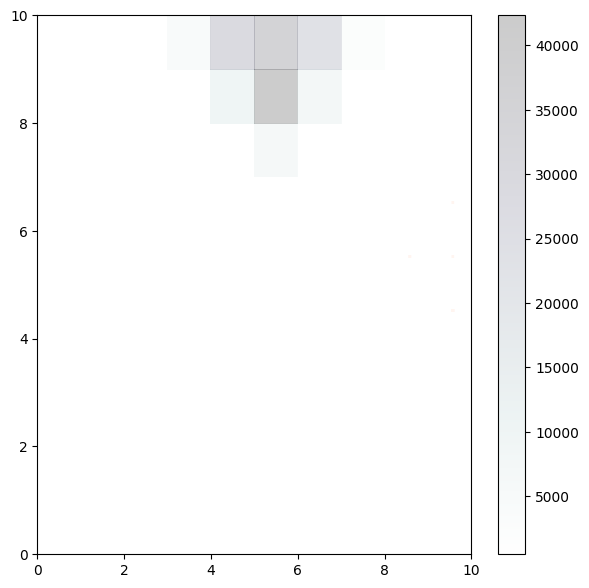

In [12]:
# Инициализация SOM
map_size = (10, 10)  # Размер карты (10x10)
input_size = data.shape[1]
som = SOM(map_size, input_size, sigma=0.3, learning_rate=0.5)

# Обучение SOM
som.train(data, 100)  # Обучение на 100 итераций

# Визуализация результатов
som.visualize(data)